In [ ]:
import pandas as pd

df = pd.read_csv("github_user_details_dataset.csv")


In [2]:
df = df.drop("username", axis=1)
df = df.fillna(0)

In [3]:
df["engagement_score"] = df["followers"] + df["total_stars"]

In [4]:
score = (
    df["total_stars"] * 3 +
    df["followers"] * 2 +
    df["active_repos"] * 4 +
    df["public_repos"]
)

In [5]:
df["strength"] = pd.cut(
    score,
    bins=[-1, 50, 150, 100000],
    labels=["Weak", "Moderate", "Strong"]
)

In [6]:
from sklearn.preprocessing import LabelEncoder

df = pd.get_dummies(df, columns=["top_language"])

le = LabelEncoder()
df["strength"] = le.fit_transform(df["strength"])

X = df.drop("strength", axis=1)
y = df["strength"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.8725490196078431
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        58
           1       0.81      0.85      0.83        20
           2       0.93      0.91      0.92       126

    accuracy                           0.87       204
   macro avg       0.84      0.85      0.84       204
weighted avg       0.87      0.87      0.87       204



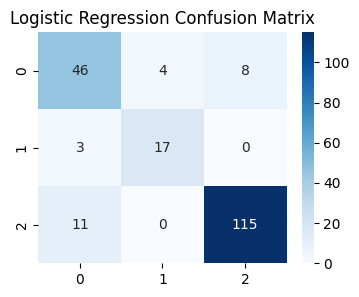


Random Forest Accuracy: 0.9656862745098039
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       1.00      0.85      0.92        20
           2       0.98      0.98      0.98       126

    accuracy                           0.97       204
   macro avg       0.97      0.93      0.95       204
weighted avg       0.97      0.97      0.97       204



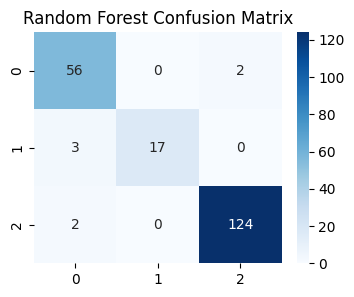


Extra Trees Accuracy: 0.9215686274509803
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        58
           1       1.00      0.75      0.86        20
           2       0.93      0.98      0.96       126

    accuracy                           0.92       204
   macro avg       0.94      0.86      0.89       204
weighted avg       0.92      0.92      0.92       204



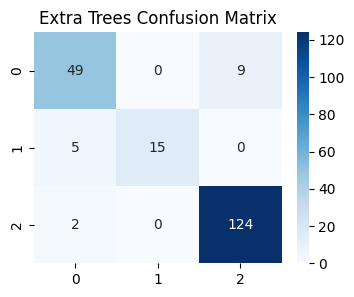


XGBoost Accuracy: 0.9509803921568627
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        58
           1       1.00      0.85      0.92        20
           2       0.98      0.97      0.97       126

    accuracy                           0.95       204
   macro avg       0.95      0.92      0.94       204
weighted avg       0.95      0.95      0.95       204



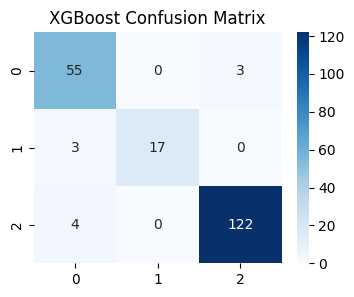

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 815, number of used features: 24
[LightGBM] [Info] Start training from score -1.256451
[LightGBM] [Info] Start training from score -2.308739
[LightGBM] [Info] Start training from score -0.484588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

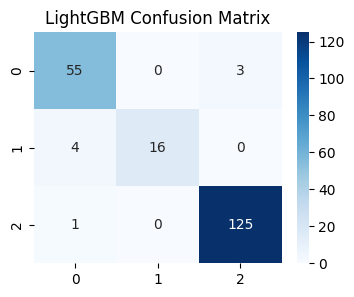

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = {}

for name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Accuracy: {acc}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

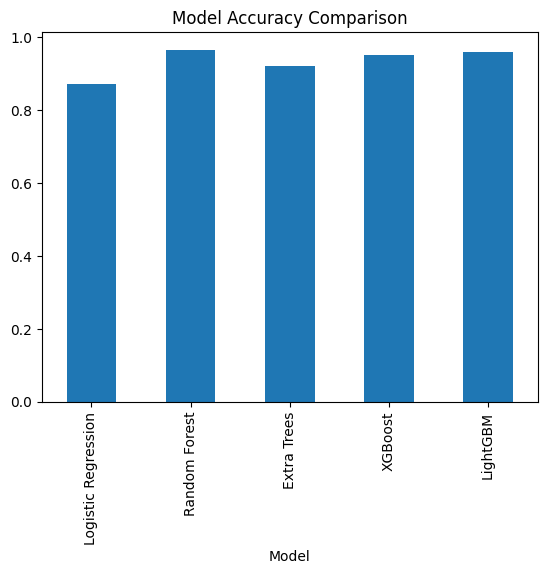

In [9]:
import pandas as pd

results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"])

results_df.plot(
    x="Model",
    y="Accuracy",
    kind="bar",
    legend=False,
    title="Model Accuracy Comparison"
)
plt.show()

In [10]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

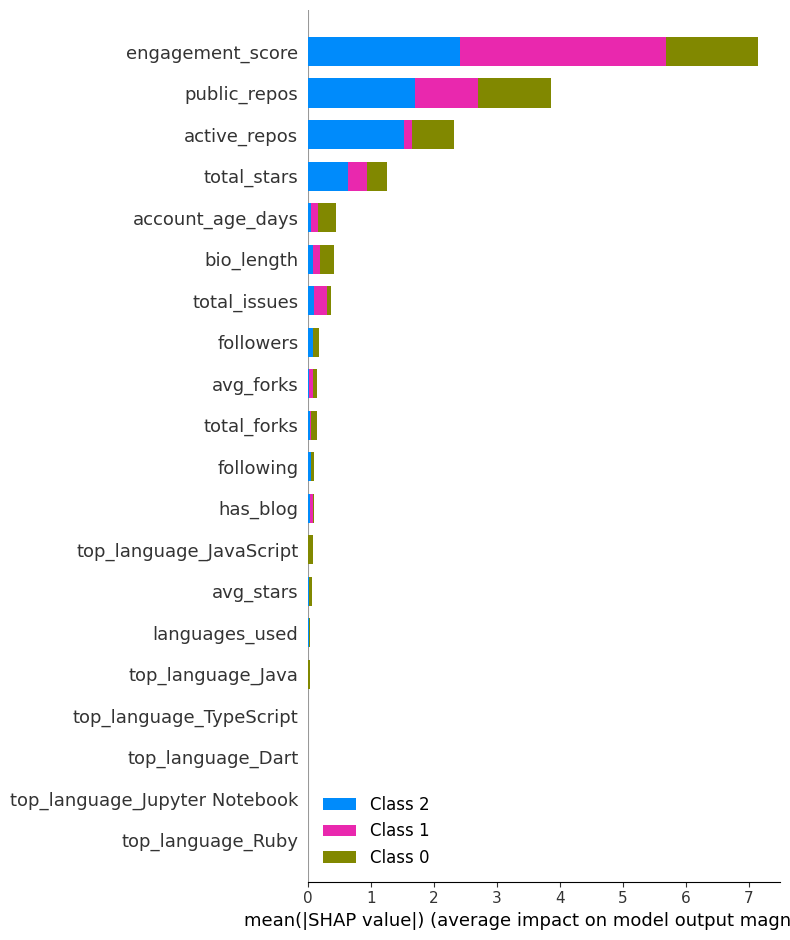

In [11]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

In [12]:
import shap
shap.initjs()
row = X_test.iloc[[0]]

pred_class = xgb_model.predict(row)[0]

shap_values = explainer(row)

shap.plots.force(
    explainer.expected_value[pred_class],
    shap_values.values[0][:, pred_class],
    row.iloc[0]
)

In [13]:
import joblib

In [14]:
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(le, "label_encoder.pkl")
joblib.dump(X_train.columns, "model_columns.pkl")
joblib.dump(X_train.mean(), "feature_means.pkl")

['feature_means.pkl']

In [15]:
from google.colab import files

files.download("xgb_model.pkl")
files.download("label_encoder.pkl")
files.download("model_columns.pkl")
files.download("feature_means.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>